# "Monte Carlo and the power of randomness"

In [4]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import scipy as sci

### Throughing pebbles on the beach and estimatiing pi

The idea behind the program is that the ratio of the area of the  circle to the square area that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$.

$$V_{c}/V_{s} = \pi r^2 / (2r)^2 = \frac{\pi}{4}$$

In [9]:
def circle_pi_estimate(N=10000, r0=10):
    '''Generate random points in the square with sides of -r0 and r0.
      Count the fraction of points falling inside the inscribed circle. Estimate pi
      '''
  
    # Generate random points
    xs = np.random.uniform(-r0, r0, size=N)
    ys = np.random.uniform(-r0, r0, size=N)

    #Convert points to boolean array corresdponding to points being inside vs outside
    pinside  = np.sqrt(xs**2 + ys**2) < r0 
    poutside = np.sqrt(xs**2 + ys**2) > r0
    
    pi_estimate = 4 * pinside.sum() / N 
    
    # Plots points 
    fig, ax=plt.subplots(figsize=(6,6))
    
    ax.plot(xs[pinside],  ys[pinside], 'b.') # points inside are blue
    ax.plot(xs[poutside], ys[poutside],'r.') # points outside are red
    ax.set_title(r"Estimation of $\pi$=" + f"{pi_estimate}", fontsize=20);

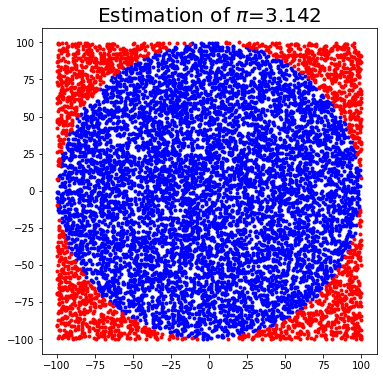

In [11]:
circle_pi_estimate(N=10000, r0=100)

To be fair as methods of computing $\pi$ go, this is not the best method. A much better method is to use Leibniz's expansion of arctan(1):

$$\frac{\pi}{4} = \sum_k \frac{(-1)^k}{2*k+1}$$

In [15]:
kmax = 1000 # 
total = 0
for k in range(kmax):
    total += pow(-1,k)/(2*k+1.0)
print(4*total)

3.140592653839794


### Shapes more complex than a circle

$$I = \int_0^2 \sin^2(\frac{1}{x(2-x)})dx$$

In [19]:
def f(x): 
    
    return np.sin(1/x/(2-x))**2

<ipython-input-19-28424583ba64>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.sin(1/x/(2-x))**2
<ipython-input-19-28424583ba64>:3: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/x/(2-x))**2
<ipython-input-19-28424583ba64>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.sin(1/x/(2-x))**2
<ipython-input-19-28424583ba64>:3: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/x/(2-x))**2


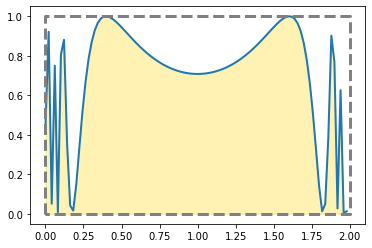

In [22]:
x = np.linspace(0.001,2,100)
plt.plot(x, f(x),lw=2)

plt.fill_between(x,f(x), color='gold',alpha=0.3)

plt.plot([0,0,2,2,0],[0,1,1,0,0],'--',lw=3,color='grey')

We will solve this problem using the same technique.  From the curve, we approximately could draw a rectangle to cover the curve in which x=[0,2], y = [0,1]. The area(volume for higher dimensions) of the rectangle is simply $A$=2. And the area under the curve is $I$ which appears to be difficult to solve. If we choose a point uniformly at random in the rectangle, What's the probability that the point falls into the region under the curve? It is obviously that $p$ = $I/A$.  

1. Generate a large number of $N$ random points in the bouding rectangle
2. Count number of points $n$ which are falling under the curve. 
3. Estimate area according to $I=Ap=A\frac{n}{N}$


Text(0.5, 1.0, 'I =  1.464 with N=1000 samples')

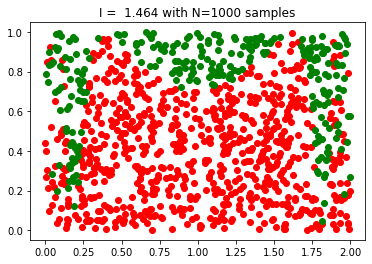

In [25]:
N=1000

x, y  = 2*np.random.rand(N),  np.random.rand(N) # generate U(0,1) and U(0,2) random points

ninside = np.sum(y<f(x))  # (x,y) points where y<f(x) 

I = 2*ninside/N


plt.plot(x[y<f(x)], y[y<f(x)],'o', color='red')
plt.plot(x[y>f(x)], y[y>f(x)],'o', color='green')

plt.title(f'I =  {I} with N={N} samples',fontsize=12)

### Basic Idea behind Monte Carlo

The basic idea of Monte Carlo integration is very simple and only requires elementary statistics. Suppose we want to find the value of the following integral in some region with volume $V$: 

$$I = \int_a^b f(x) dx $$

Monte Carlo integration estimates this integral by estimating the fraction of random points that fall below $f(x)$  multiplied by $V$. In other words we are follwing the same procedure as for evaluating pi but this time our area is the area under some general function instead of a circule inscribed in square. 

#### Computing expectations by drawing random numbers

Using probability language, Monte Carlo simulation tallows us to obtain an estimate of the expectation 

$$
E[g(X)] = \int g(x) p(x) dx
$$

$$
\bar{g}_n = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$

where points $x_i \sim p$ are draw from the probability density $p$.

#### Variance shrinks as $N^{0.5}$ thanks to LLN, CLT.

Sine random variables are i.i.d we can use Central Limit Theorem toestimate the Monte Carlo variance of the approximation as 

$$
\sigma^2_n = \frac{1}{n^2} \sum_{i=1}^n (g(x_i) - \bar{g_n})^2)
$$

Also, according to Central Limit Theorem, expectation of sum of random variables scaled by standard deviaton tends to normal distribution:

$$
\frac{\bar{g_n} - E[g(X)]}{\sigma_n} \sim \mathcal{N}(0, 1)
$$
Therefore the convergence of Monte Carlo integration is $\mathcal{0}(n^{1/2})$ and independent of the dimensionality. Hence Monte Carlo integration generally beats numerical integration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $\mathcal{0}(n^{d})$. Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

#### The essence of MC: Casting integrals as epexctations!

Back to evaluating integrals. We want to have an efficient way of finding integrals like this:

$$I = \int{f(x)} \, dx$$
Consider the expectation of a function $g(x)$ with respect to some distribution $p(x)$. By definition, we have

$$
E[g(x)] = \int{g(x) \, p(x) \, dx}
$$
If we choose $g(x) = f(x)/p(x)$, then we have

$$
E[g(x)] = \int{\frac{f(x)}{p(x)} \, p(x) \, dx} = \int{f(x) dx} = I
$$

By the law of large numbers, the average converges on the expectation, so we have

$$
I \approx \bar{g_n} = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$

Where random points $x_i$ are generated from the distribution $p(x)$. If $f(x)$ is a proper integral (i.e. bounded), and $p(x)$ is the uniform distribution on $[0,1]$, then $g(x) = f(x)$ and this is known as ordinary Monte Carlo. If the integral of $f(x)$ is improper, then we need to use another distribution with the same support as $f(x)$.

 #### Using Monte Carlo: evaluation of a definite integral

We want to estimate the following integral $I=\int_0^1 e^x dx$.

Text(0, 0.5, '$e^{x}$')

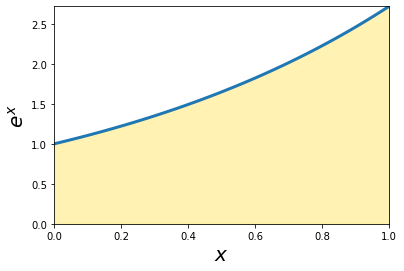

In [15]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x),linewidth=3.0)

plt.fill_between(x, np.exp(x),color='gold',alpha=0.3)

plt.xlim([0,1])
plt.ylim([0, np.exp(1)])

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$e^{x}$',fontsize=20)

We can evaluate via quadrature as told in calculus:

In [16]:
from scipy import integrate

y, err = integrate.quad(np.exp, 0, 1)
print("Exact result:", y, err) 


for n in 10**np.array([1,2,3,4,5,6,7,8]):
    
    x = np.random.uniform(0, 1, n)
    gn = np.mean(np.exp(x))
    
    print('N of samples: %10d %.6f' % (n, gn))

Exact result: 1.7182818284590453 1.9076760487502457e-14
N of samples:         10 2.012628
N of samples:        100 1.743364
N of samples:       1000 1.693997
N of samples:      10000 1.720441
N of samples:     100000 1.716038
N of samples:    1000000 1.718766
N of samples:   10000000 1.718241
N of samples:  100000000 1.718278


#### Intuition for error rate: Why Monte Carlo can beat brute force integration.

Consider summing over many such IID (independent identically distributed) points: 

$$S_n = f(x_1) + f(x_2) + ... + f(x_n)$$

The sample mean is an approximation to the integral we are hoping to estimate via MC sampling $I \approx S_n/n$ 

Using Chebyshev's inequality we can see how fast the sample eman converges to true value wiht the number of samples:

$$ P \left( \left| \frac{S_n}{n} - I \right| \ge \epsilon \right) \le \frac{V(S_1)}{\epsilon^2 N} =\delta$$   

Where $\delta$ quantifies simulation error frequency and $\epsilon$ accuracy of the desired result. 

Suppose we want 1% accuracy and 99% confidence - i.e. set $\epsilon =\delta =  0.01$. The above inequality tells us that we can achieve this with just $N = 1/(\delta \epsilon^2) = 1,000,000$ samples, regardless of the data dimensionality.

#### Example-3 of using Monte Carlo: monitoring the convergence (decresase of variance)

We are often interested in knowing how many iterations it takes for Monte Carlo integration to "converge". To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

For the example, we will try to estimate the function (again)

$$
f(x) = x \cos 71 x + \sin 13x, \ \  0 \le x \le 1
$$

Text(0, 0.5, '$f(x)$')

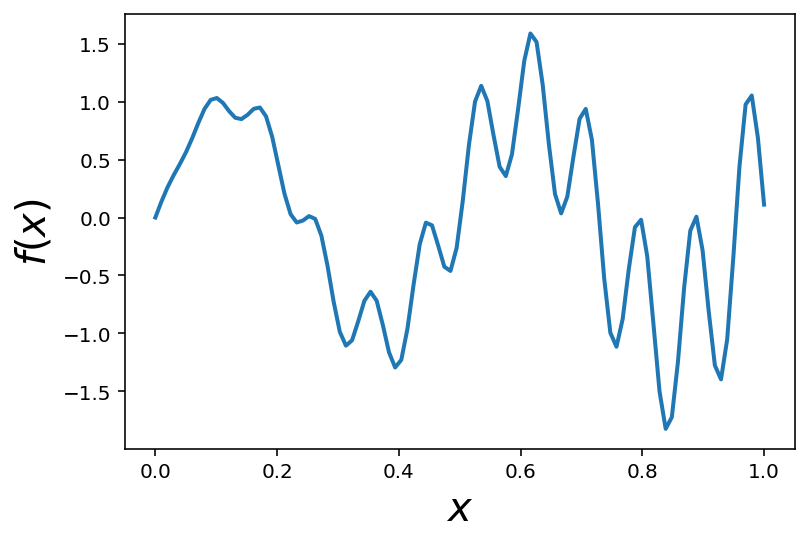

In [119]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

x = np.linspace(0, 1, 100)

plt.plot(x, f(x),linewidth=2.0)


plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)

When we do a single run of MC we use one long sequence of unform random numbers

In [52]:
# sequence of n uniform random numbers
n = 100 
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

-0.1915690209919715

We vary the sample size from 1 to 100 and calculate the value of $y = \sum{x}/n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size. The blue lines indicate the 2.5th and 97.5th percentiles, and the red line a sample path.

Text(0.5, 0, 'Number of independent MC runs')

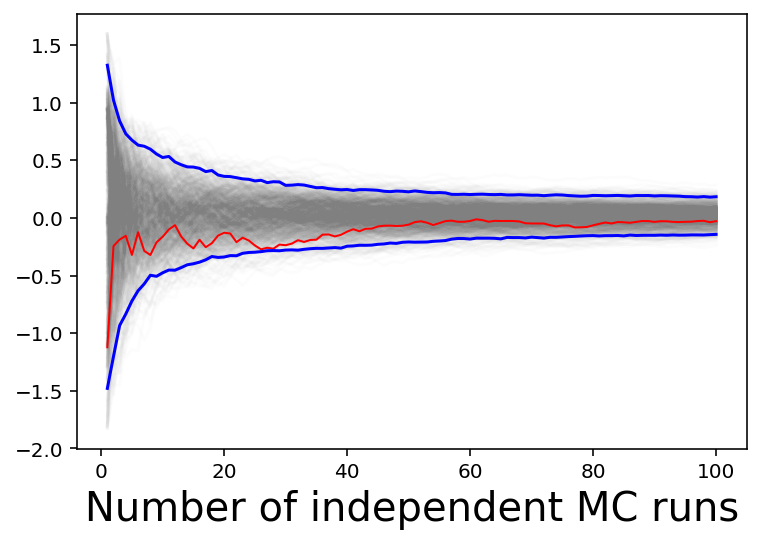

In [120]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

upper, lower = np.percentile(y, [2.5, 97.5], axis=1)


plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')

plt.xlabel('Number of independent MC runs',fontsize=20)

#### On variance Reduction
With independent samples $y_i = f(x_i)/p(x_i)$ the variance of the Monte Carlo estimate is

$$
\text{Var}[\bar{g_n}] = \text{Var} \left[ \frac{1}{n} \sum_i y_i \right ]= \frac{1}{n^2} \sum_{i=1}^{n} \text{Var}[y_i] = \frac{1}{n} \text{Var}[y_i]
$$

The objective is to make $\text{Var}[\bar{g_n}]\sim n^{-1}$ as small as possible for the same number of samples $n$.

There are several variance reduction techniques (also colorfully known as Monte Carlo swindles). We will illustrate one such powerful tecnique called the importance sampling technique.

#### Importance sampling

Suppose we want to evaluate

$$
I = \int{h(x)\,p(x) \, dx}
$$
where $h(x)$ is some function and $p(x)$ is the PDF of $x$. If it is hard to sample directly from $p$, we can introduce a new density function  $q(x)$ that is easy to sample from, and write

$$
I = \int{h(x)\, p(x)\, dx} = \int{h(x)\, \frac{p(x)}{q(x)} \, q(x) \, dx}
$$
In other words, we sample from $h(y)$ where $y \sim q$ and weight it by the likelihood ratio $\frac{p(y)}{q(y)}$, estimating the integral as

$$
I \approx \frac{1}{n}\sum_{i=1}^n \frac{p(y_i)}{q(y_i)} h(y_i)
$$
Sometimes, even if we can sample from $p$ directly, it is more efficient to use another distribution.

#### Example of importance sampling

Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.


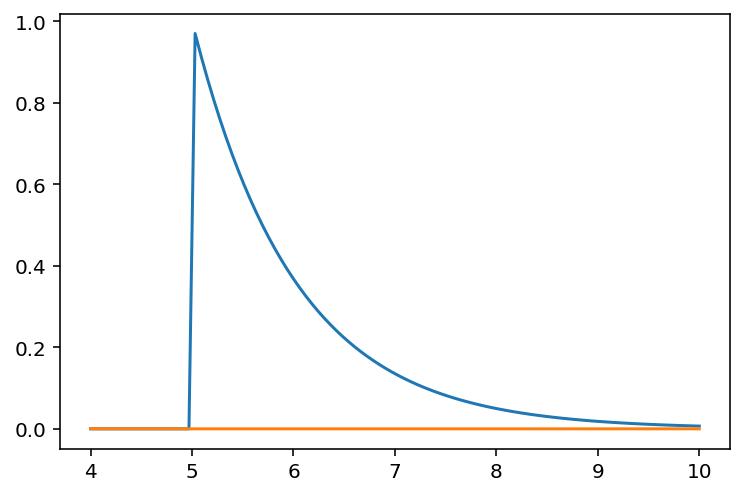

In [56]:
x = np.linspace(4, 10, 100)
plt.plot(x, sci.stats.expon(5).pdf(x))
plt.plot(x, sci.stats.norm().pdf(x))

We expect about 3 draws out of 10,000,000 from $\mathcal{N}(0, 1)$ to have a value greater than 5. Hence simply sampling from $\mathcal{N}(0, 1)$ is hopelessly inefficient for Monte Carlo integration.

In [57]:
v_true = 1 - sci.stats.norm().cdf(5)
v_true

2.866515719235352e-07

In [122]:
# using direct sampling with p(x)=N(0,1)

n = 10000
y = sci.stats.norm().rvs(n)
v_mc = 1.0/n * np.sum(y > 5)

# estimate and relative error
print('Direct MC & error:', v_mc, np.abs(v_mc - v_true)/v_true)

# using importance sampling with p(x)=exp(x)
n = 10000
y = sci.stats.expon(loc=5).rvs(n)
v_is = 1.0/n * np.sum(sci.stats.norm().pdf(y)/sci.stats.expon(loc=5).pdf(y))

# estimate and relative error
print('Direct IS MC & error:',v_is, np.abs(v_is- v_true)/v_true)

Direct MC & error: 0.0 1.0
Direct IS MC & error: 2.8558938697595396e-07 0.0037054914454282824


### Markov Chains

Suppose we have the following transition table:

| Location    | Ames   | Des Moines | Ankeny |
|:------------|:--------|:------------|:-------|
| Ames     | 0.9     | 0.05        | 0.05   |
| Des Moines | 0.1     | 0.8         | 0.1    |
| Ankeny      | 0.04    | 0.01        | 0.95   |

This says that a resident of Ames this year has a 90% chance of stying in Ames and a 5% chance of relocating to Des Moines or Ankeny the following year. Note that the probabilities only depend on the current year. The transitions between states (Ames, Des Moines and Ankeny) are then said to be modeled by a Markov chain. 

If all cities each started with 300,000 residents, what is the long run distribution assuming no immigration or emigration?

In [133]:
# Construct Matrix
A = np.array([
    [0.9, 0.05, 0.05],
    [0.1, 0.8, 0.1],
    [0.04, 0.01, 0.95]
])

# Specify the shape
x = np.array([300000, 300000, 300000]).reshape(3,1)
x

array([[300000],
       [300000],
       [300000]])

In [138]:
x.T@A  # After one year

array([[312000., 258000., 330000.]])

In [139]:
x.T @ A @ A # After two years

array([[319800., 225300., 354900.]])

In [141]:
n = 100
x.T @ np.linalg.matrix_power(A, n)  # Brute force solution by raising matrix into powers

array([[300000.50469469, 100000.21203929, 499999.28326602]])

#### Eigenvector solution

At steady state, we have

$$
p^T A = p^T
$$

Taking the transpose on both sides, we see that

$$
A^Tp = p
$$

suggesting that the steady state probability vector is the normalized eigenvector of $A^T$ with $\lambda = 1$.

In [67]:
E, V = np.linalg.eig(A.T)

E

array([1.        , 0.88520797, 0.76479203])

#### Population dynamics as a  markov chain simultion

Consider a population that cannot comprise more than N=100 individuals, and define the birth and death rates:

In [69]:
N = 100  # maximum population size
a = .5 / N  # birth rate
b = .5 / N  # death rate

We simulate a Markov chain on the finite space $0,1,...,N.$ Each state represents a population size. The x vector will contain the population size at each time step. We set the initial state to $x_0=25$ (that is, there are 25 individuals in the population at initialization time):

In [70]:
nsteps = 1000
x = np.zeros(nsteps)
x[0] = 25

Now we simulate our chain. At each time step t, there is a new birth with probability $ax_t$, and independently, there is a new death with probability $bx_t$. These **probabilities are proportional to the size of the population** at that time. If the population size reaches $0$ or $N$, the evolution stops:

In [71]:
for t in range(nsteps - 1):
    
    if 0 < x[t] < N - 1:
        # Is there a birth?
        birth = np.random.rand() <= a * x[t]
        # Is there a death?
        death = np.random.rand() <= b * x[t]
        # We update the population size.
        x[t + 1] = x[t] + 1 * birth - 1 * death
    # The evolution stops if we reach $0$ or $N$.
    else:
        x[t + 1] = x[t]

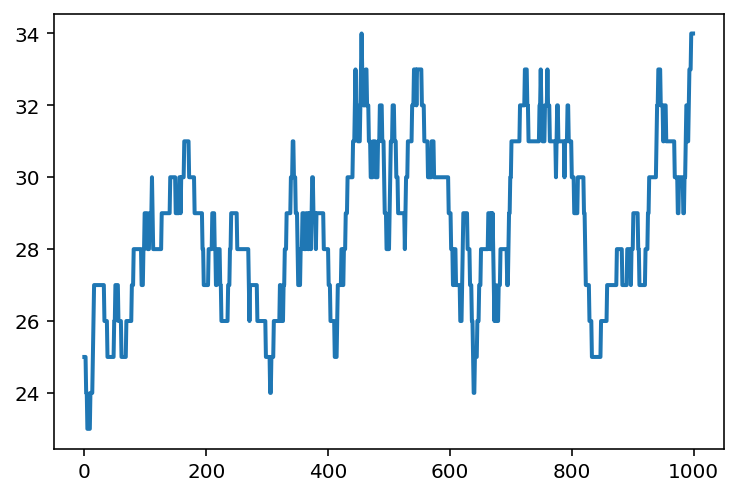

In [72]:

fig, ax = plt.subplots()

ax.plot(x, lw=2)

#### Consider many independent trials now. 

In [89]:
ntrials = 100
x = np.random.randint(size=ntrials, low=0, high=N)  #Trying to avoid nested loops

In [90]:
def simulate(x, nsteps):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # Which trials to update?
        upd = (0 < x) & (x < N - 1)
        # In which trials do births occur?
        birth = 1 * (np.random.rand(ntrials) <= a * x)
        # In which trials do deaths occur?
        death = 1 * (np.random.rand(ntrials) <= b * x)
        # We update the population size for all trials
        x[upd] += birth[upd] - death[upd]

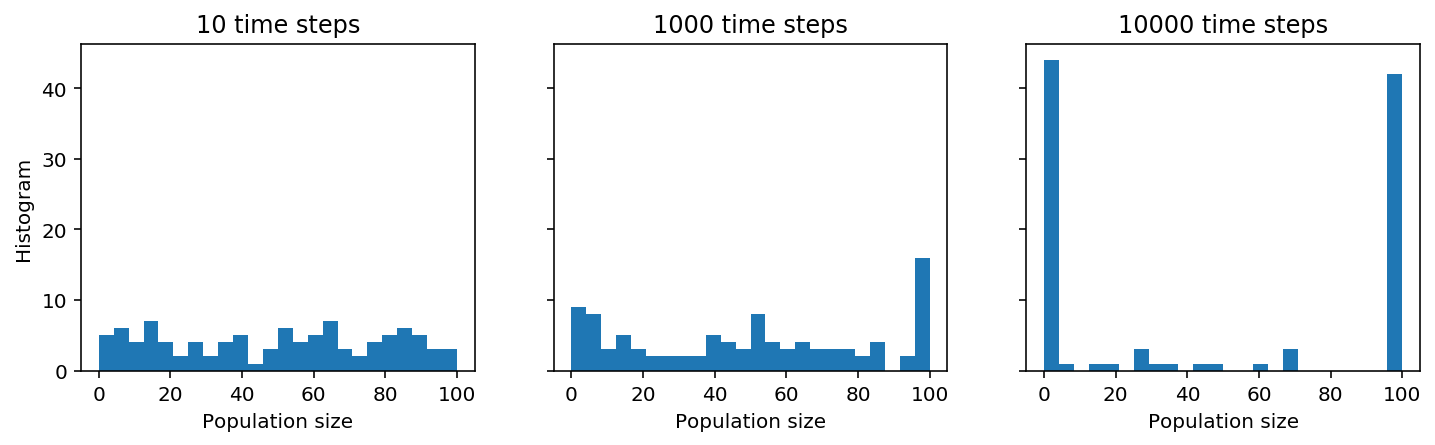

In [91]:
bins = np.linspace(0, N, 25)
nsteps_list = [10, 1000, 10000]

fig, axes = plt.subplots(1, len(nsteps_list),figsize=(12, 3),sharey=True)

for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")

### Problems

####  Problem-1: Confined diffusion.
Simulate 2D random walk in a circular confinement. Re-write 2D brownian motion code to simulate diffusion of a particle which is stuck inside a sphere. 
Study how root mean square deviation of position scales with time. Carry out simulations for different coninement sizes. Make plots of simulated trajectories.

####  Problem-2: continuous time random walk (CTRW)

Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. <br>
Hint: you may want to use random variables from scipy.stats.exp <br>

[scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) <br>

Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 

####  Problem-3: Breaking the CLT; Cauchy vs Normal random walk in 2D

For this problem we are going to simulate two kinds of random walks in continuum space (not lattice): Levy flights and Normal distributd random walk. 

To simulate a 2D continuum space random walk we need to generate random step sizes $r_x$, $r_y$. 
Also you will need unifrom random namber to sample angles in 2D giving you a conitnuum random walk in 2D space: $x = r_x sin\theta$ and $y=r_ycos\theta$

- Normally: $r\sim N(0,1)$
- Cauchy distribution (long tails, infinite variance) $r\sim Cauchy(0,1)$
- Unform angles $\theta \sim U(0,1)$

Visualize random walk using matplotlib and study statistics of random walkers the way that is done for normal random walk/brownian motion examples!

#### Problem-4: MC, the crude version

Evaluate the following integral $\int^{\infty}_0 \frac{e^{-x}}{1+(x-1)^2} dx$ using Monte Carlo methods. 
- Start by doing a direct monte carlo on uniform interval. 
- Try an importance sampling approach using en exponential probability distribution. 
- Find the optimal value of $\lambda $ that gives the most rapid reduction of variance [Hint: experiment with different values of $\lambda$]

#### Problem-5 MC method for evaluating 1D and 2D integrals

- Since you got some experience doing MC integrations maybe you feel like generalizing your apporach a bit. Can you write a function called mc_int(f, x0, x1, N) which does monte carlo integration of simple well behaved functions f over interval x0 to x1 using N unifrom distributed random numbers on $[x0, x1]$. You can also make do_mc() plot where the random points fell on the f(x) function in addition to returning the value of the evaluated integral.  

- Generalize your function to compute 2D integral mc_int(f, x0, x1, y0, y1 N). Test this function by computing simple rectangular shaped area functions, e.g $x_0=1, x_1 =3, y_0=1, y_1=5$